In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

path = "https://raw.githubusercontent.com/bryantjay/Portfolio/refs/heads/main/Quickies/Seattle%20Labor%20Spending%20by%20Department/source_files/City_of_Seattle_Wage_Data_20250222.csv"

wages = pd.read_csv(path)

wages.columns = wages.columns.str.strip().str.replace(' ', '_').str.replace(r'([a-z0-9])([A-Z])', r'\1_\2').str.lower()

print(wages.head(10), "\n")
print(wages.info(), "\n")
print(wages.describe(include='all'))

  employee_id                      department                 job_title  \
0      E00001  Office of Economic Development        StratAdvsr2,Exempt   
1      E00002  Office of Economic Development        Admin Staff Asst *   
2      E00003      Education & Early Learning        StratAdvsr1,Exempt   
3      E00004      Education & Early Learning          Admin Staff Asst   
4      E00005      Education & Early Learning  Grants&Contracts Spec,Sr   
5      E00006      Education & Early Learning       Early Ed Spec,Sr BU   
6      E00007    Police Relief & Pension Fund       Contract Employee *   
7      E00008              Parks & Recreation         Sfty&Hlth Spec,Sr   
8      E00009              Parks & Recreation      High School Intern *   
9      E00010              Parks & Recreation      High School Intern *   

   hourly_rate  
0       71.320  
1       38.460  
2       60.646  
3       44.830  
4       43.100  
5       52.200  
6       94.473  
7       53.820  
8       19.970  
9   

In [2]:
print(wages.columns)

Index(['employee_id', 'department', 'job_title', 'hourly_rate'], dtype='object')


In [3]:
print(f"Number of City Departments: {wages['department'].nunique()}")
print(f"Total Number of Positions: {wages['job_title'].nunique()}\n")

departments = wages.groupby('department').agg(
    unique_job_titles=('job_title', 'nunique'),
    num_employees=('employee_id', 'size'),
    mean_hourly_rate=('hourly_rate', lambda x: round(x.mean(), 2)),
    median_hourly_rate=('hourly_rate', lambda x: round(x.median(), 2))
).reset_index()

departments['pct_mean_med_diff'] = round((departments.mean_hourly_rate - departments.median_hourly_rate) / departments.median_hourly_rate * 100, 1)
#departments['median_salary'] = departments.median_hourly_rate * 2000
departments['hourly_dept_spending'] = departments.num_employees * departments.median_hourly_rate

Number of City Departments: 40
Total Number of Positions: 1157

|    | department                     |   unique_job_titles |   num_employees |   mean_hourly_rate |   median_hourly_rate |   pct_mean_med_diff |   hourly_dept_spending |
|---:|:-------------------------------|--------------------:|----------------:|-------------------:|---------------------:|--------------------:|-----------------------:|
|  0 | Arts & Culture                 |                  28 |              44 |              49.87 |                48.46 |                 2.9 |                2132.24 |
|  1 | City Auditor                   |                   4 |               9 |              72.26 |                73.88 |                -2.2 |                 664.92 |
|  2 | City Budget Office             |                   8 |              42 |              70.1  |                68.48 |                 2.4 |                2876.16 |
|  3 | City of Seattle                |                   2 |               2 |  

### Here's the data we're looking at:

|    | department                     |   unique_job_titles |   num_employees |   mean_hourly_rate |   median_hourly_rate |   pct_mean_med_diff |   hourly_dept_spending |
|---:|:-------------------------------|--------------------:|----------------:|-------------------:|---------------------:|--------------------:|-----------------------:|
|  0 | Arts & Culture                 |                  28 |              44 |              49.87 |                48.46 |                 2.9 |                2132.24 |
|  1 | City Auditor                   |                   4 |               9 |              72.26 |                73.88 |                -2.2 |                 664.92 |
|  2 | City Budget Office             |                   8 |              42 |              70.1  |                68.48 |                 2.4 |                2876.16 |
|  3 | City of Seattle                |                   2 |               2 |              88.01 |                88.01 |                 0   |                 176.02 |
|  4 | Civil Service Commissions      |                   4 |              13 |              21.46 |                 5.53 |               288.1 |                  71.89 |
|  5 | Commnty Asst Resp & Engagmt    |                  18 |             139 |              48.48 |                45.04 |                 7.6 |                6260.56 |
|  6 | Community Police Commission    |                   7 |              10 |              63.94 |                58.71 |                 8.9 |                 587.1  |
|  7 | Construction & Inspections     |                  91 |             431 |              59.81 |                58.85 |                 1.6 |               25364.4  |
|  8 | Econ & Revenue Forecasts Dept  |                   2 |               2 |              69.1  |                69.1  |                 0   |                 138.2  |
|  9 | Education & Early Learning     |                  36 |             115 |              54.62 |                52.2  |                 4.6 |                6003    |
| 10 | Employees' Retirement System   |                  16 |              31 |              63.75 |                60.83 |                 4.8 |                1885.73 |
| 11 | Ethics & Elections Commission  |                   7 |              10 |              65.15 |                66.34 |                -1.8 |                 663.4  |
| 12 | Finance & Admin Services       |                 128 |             574 |              53.84 |                51.56 |                 4.4 |               29595.4  |
| 13 | Fire Department                |                 135 |            1087 |              56.8  |                55.19 |                 2.9 |               59991.5  |
| 14 | Hearing Examiner               |                   5 |               5 |              65.18 |                60.83 |                 7.2 |                 304.15 |
| 15 | Human Services Department      |                  80 |             413 |              49.24 |                45.92 |                 7.2 |               18965    |
| 16 | Immigrant & Refugee Affairs    |                   6 |              11 |              54.58 |                50.92 |                 7.2 |                 560.12 |
| 17 | Information Technology         |                  49 |             619 |              66.18 |                64.07 |                 3.3 |               39659.3  |
| 18 | Intergovernment Relations      |                   4 |               9 |              72.69 |                71.21 |                 2.1 |                 640.89 |
| 19 | Legislative Department         |                  18 |              93 |              60.82 |                58.2  |                 4.5 |                5412.6  |
| 20 | Mayor's Office                 |                  11 |              38 |              72.39 |                63.88 |                13.3 |                2427.44 |
| 21 | Neighborhoods                  |                  25 |              58 |              53.72 |                53.19 |                 1   |                3085.02 |
| 22 | Off of Emergency Mngmnt Dept   |                  10 |              17 |              58.3  |                60.87 |                -4.2 |                1034.79 |
| 23 | Office for Civil Rights        |                  16 |              33 |              56.25 |                54.4  |                 3.4 |                1795.2  |
| 24 | Office of Economic Development |                  28 |              51 |              57.65 |                58.16 |                -0.9 |                2966.16 |
| 25 | Office of Employee OMBUD       |                   6 |               7 |              58.12 |                53.09 |                 9.5 |                 371.63 |
| 26 | Office of Housing              |                  35 |              60 |              56.16 |                52.2  |                 7.6 |                3132    |
| 27 | Office of Inspector General    |                   7 |              21 |              60.47 |                56.24 |                 7.5 |                1181.04 |
| 28 | Office of Labor Standards      |                  14 |              31 |              55.75 |                57.98 |                -3.8 |                1797.38 |
| 29 | Parks & Recreation             |                 190 |            2029 |              34.44 |                31.63 |                 8.9 |               64177.3  |
| 30 | Planning & Comm Development    |                  22 |              47 |              61.84 |                62.58 |                -1.2 |                2941.26 |
| 31 | Police Department              |                 135 |            1461 |              65.25 |                68.76 |                -5.1 |              100458    |
| 32 | Police Relief & Pension Fund   |                   1 |               5 |              85.03 |                78.73 |                 8   |                 393.65 |
| 33 | Seattle Center                 |                 102 |             617 |              37.81 |                38.69 |                -2.3 |               23871.7  |
| 34 | Seattle City Light             |                 272 |            1755 |              58.17 |                60.83 |                -4.4 |              106757    |
| 35 | Seattle Dept of Human Resource |                  36 |              99 |              63.93 |                61.06 |                 4.7 |                6044.94 |
| 36 | Seattle Dept of Transportation |                 158 |            1053 |              54.77 |                55.15 |                -0.7 |               58072.9  |
| 37 | Seattle Public Library         |                  99 |             633 |              41.38 |                39.11 |                 5.8 |               24756.6  |
| 38 | Seattle Public Utilities       |                 234 |            1425 |              53.53 |                49.58 |                 8   |               70651.5  |
| 39 | Sustainability & Environment   |                  23 |              50 |              59.24 |                63.64 |                -6.9 |                3182    |

In [4]:
# Default plot settings
plt.rcParams['figure.facecolor'] = 'whitesmoke'
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['font.family'] = 'DejaVu Sans'

C:\Users\sbrya\AppData\Local\Temp\ipykernel_21248\352536580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=departments_filtered, y='department', x='median_hourly_rate', palette='viridis')


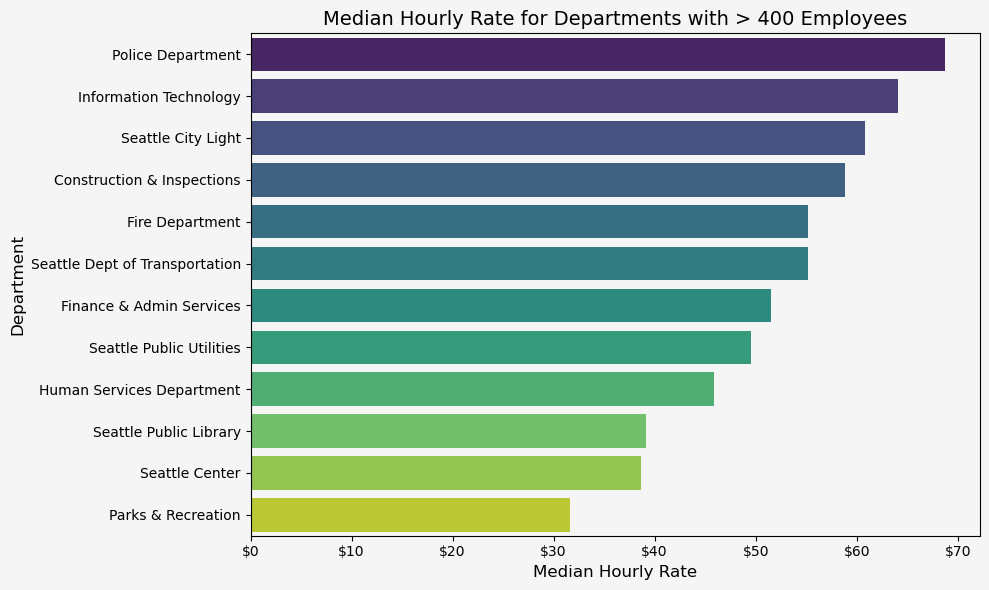

In [5]:
# Filter departments with more than 400 employees
departments_filtered = departments[departments['num_employees'] > 400]

# Sort by median_hourly_rate in descending order
departments_filtered = departments_filtered.sort_values('median_hourly_rate', ascending=False)

# Create the horizontal bar plot for 'median_hourly_rate'
plt.figure(figsize=(10, 6))
sns.barplot(data=departments_filtered, y='department', x='median_hourly_rate', palette='viridis')

# Format x-axis tick labels with "$" symbol
formatter = FuncFormatter(lambda x, _: f'${x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Median Hourly Rate', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.title('Median Hourly Rate for Departments with > 400 Employees', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\sbrya\AppData\Local\Temp\ipykernel_21248\3373202623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=departments_sorted, y='department', x='hourly_dept_spending', palette='viridis')


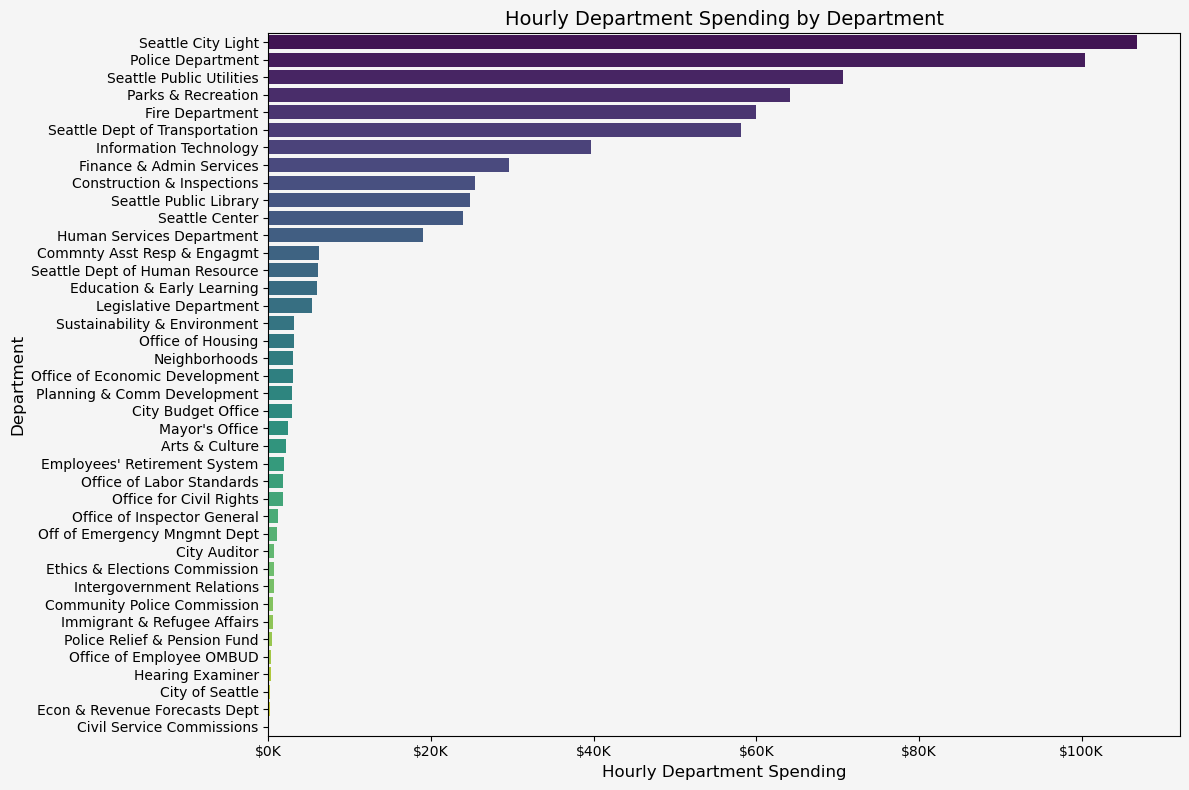

In [6]:
from matplotlib.ticker import FuncFormatter

# Sort departments by 'hourly_dept_spending' in descending order
departments_sorted = departments.sort_values('hourly_dept_spending', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=departments_sorted, y='department', x='hourly_dept_spending', palette='viridis')

# Format x-axis tick labels with "$" and "K" suffix
formatter = FuncFormatter(lambda x, _: f'${x / 1000:.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Hourly Department Spending', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.title('Hourly Department Spending by Department', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\sbrya\AppData\Local\Temp\ipykernel_21248\541502789.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=departments_sorted, y='department', x='hourly_dept_spending', palette='viridis')


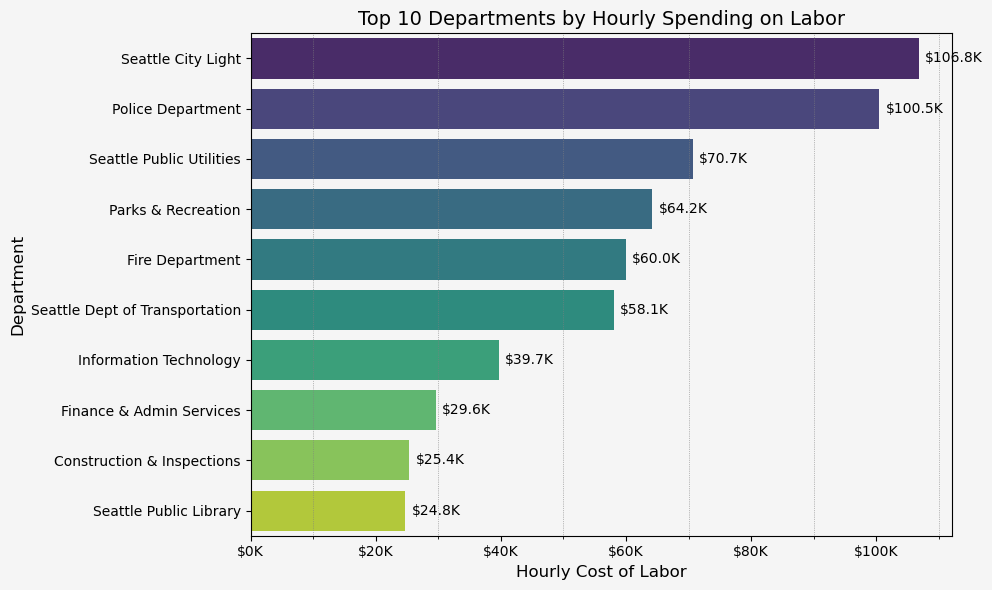

In [7]:
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Sort departments by 'hourly_dept_spending' in descending order and take the top 10
departments_sorted = departments.sort_values('hourly_dept_spending', ascending=False).head(10)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=departments_sorted, y='department', x='hourly_dept_spending', palette='viridis')

# Enable minor ticks and add gridlines only on the x-axis
plt.grid(True, axis='x', which='minor', linestyle=':', linewidth=0.5, color='gray')  # Minor gridlines on x-axis only

# Set minor gridlines every 10,000 x units
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))  # Every 10,000 units on x-axis

# Format x-axis tick labels
formatter = FuncFormatter(lambda x, _: f'${x / 1000:.0f}K')
ax.xaxis.set_major_formatter(formatter)

# Add labels to each bar (formatted with 'K' suffix)
for p in ax.patches:
    value = p.get_width()
    label = f'${value / 1000:.1f}K'  # Format to nearest thousand with "K" suffix 
    ax.text(p.get_width() + 1000, p.get_y() + p.get_height() / 2, 
            label, 
            horizontalalignment='left', verticalalignment='center', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Hourly Cost of Labor', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.title('Top 10 Departments by Hourly Spending on Labor', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


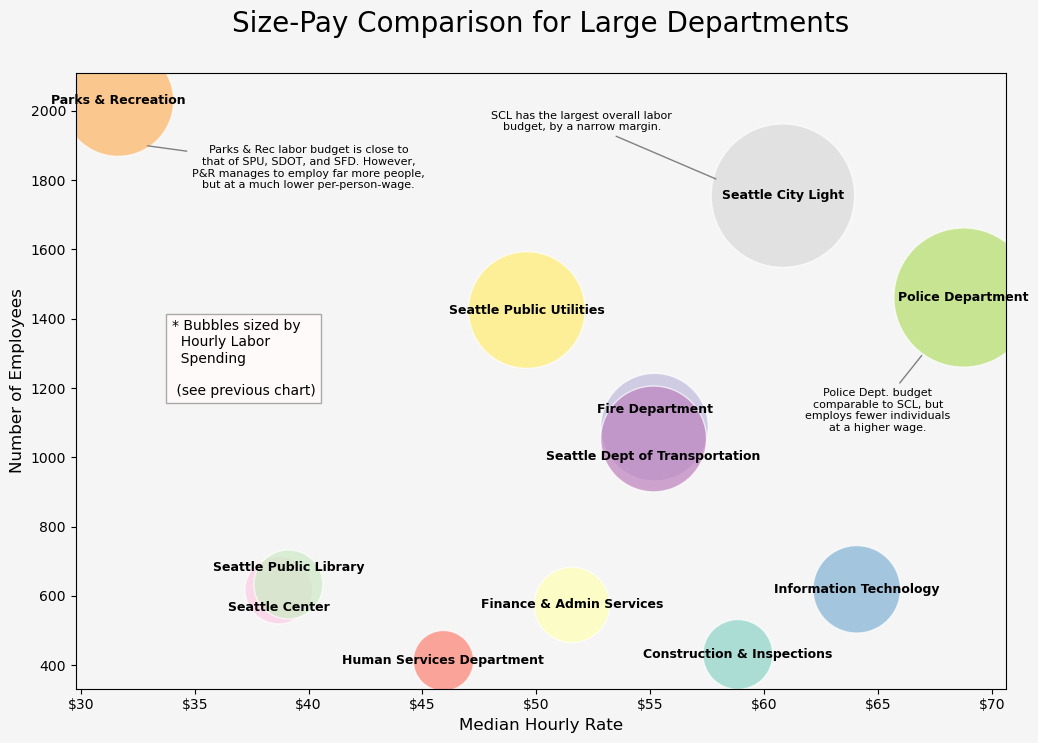

In [ ]:
# Filter departments with more than 400 employees
departments_filtered = departments[departments['num_employees'] > 400]

# Figure initiation
plt.figure(figsize=(12, 8))

# Bubble plot creation
plt.scatter(
    x=departments_filtered['median_hourly_rate'],
    y=departments_filtered['num_employees'],
    s=(departments_filtered['hourly_dept_spending']) / 10,
    c=range(len(departments_filtered)),
    cmap='Set3',
    alpha=0.7,
    edgecolors='w',
)

# Bubble (Department) labels
for i, row in departments_filtered.iterrows():
    if row['department'] in ["Seattle Public Library", "Fire Department"]:
        y = row['num_employees'] + 50
    elif row['department'] in ["Seattle Center", "Seattle Dept of Transportation"]:
        y = row['num_employees'] - 50
    else:
        y = row['num_employees']

    plt.text(
        row['median_hourly_rate'],  # x-coord
        y,  # y-coord
        row['department'],  # text
        ha='center',
        va='center',
        fontsize=9,
        weight='bold'
    )

# Asterisk note
plt.text(34, 1180,
        "* Bubbles sized by\n  Hourly Labor\n  Spending\n\n (see previous chart)",
        bbox=dict(
            facecolor='snow',
            edgecolor='darkgray'
            )
    )

# Formula for quickly-plotted annotations
def annot(text, xy=(0,0), xytext=(0,0)):
    plt.annotate(
        text,
        xy=xy,
        xytext=xytext,
        arrowprops=dict(arrowstyle='-', color='gray'),
        fontsize=8,
        color='black',
        ha='center',
        va='top'
    )


# Police Department annotation
police_text = """Police Dept. budget
comparable to SCL, but
employs fewer individuals
at a higher wage."""

annot(police_text, xy=(67, 1300), xytext=(65, 1200))


# Seattle City Light annotation
scl_text = """SCL has the largest overall labor
budget, by a narrow margin."""

annot(scl_text, xy=(58, 1800), xytext=(52, 2000))


# Parks & Recreation annotation
pnr_text = """Parks & Rec labor budget is close to
that of SPU, SDOT, and SFD. However,
P&R manages to employ far more people,
but at a much lower per-person-wage."""

annot(pnr_text, xy=(32.8, 1900), xytext=(40, 1900))


# Format x-tick labels
formatter = FuncFormatter(lambda x, _: f'${x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Title and axis labels
plt.xlabel('Median Hourly Rate', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.title('Size-Pay Comparison for Large Departments\n', fontsize=20)

# Show figure
plt.show()
